<a href="https://colab.research.google.com/github/deriiinjv/pytorch-ml-experiments/blob/main/customdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import torch
from torch import nn


In [181]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [182]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"


if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [183]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [184]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [185]:
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/pizza/3475871.jpg
Image class: pizza
Image height: 512
Image width: 512


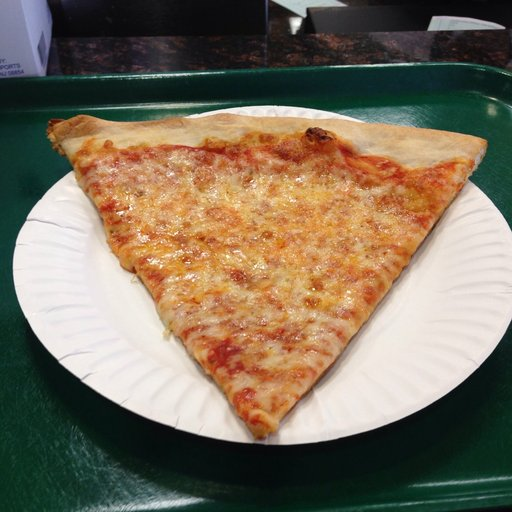

In [186]:
import random
from PIL import Image

random.seed(43)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

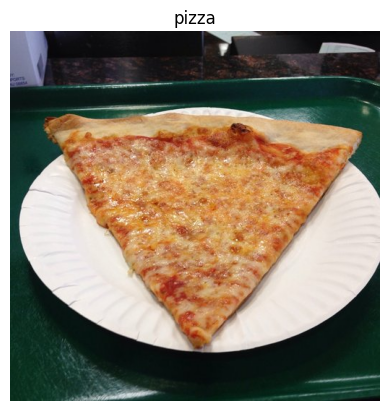

In [187]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array=np.asarray(img)
plt.imshow(img_as_array)
plt.title(image_class)
plt.axis(False)

In [188]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [189]:
data_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

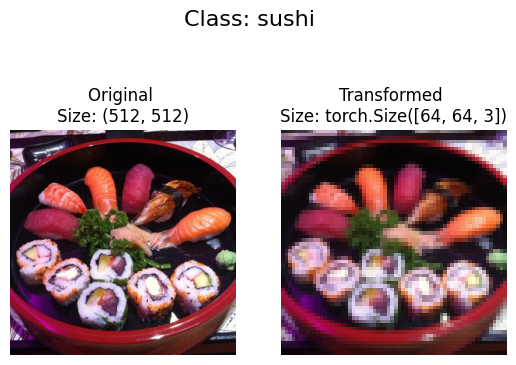

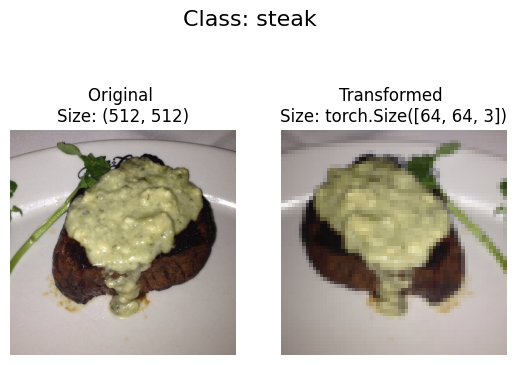

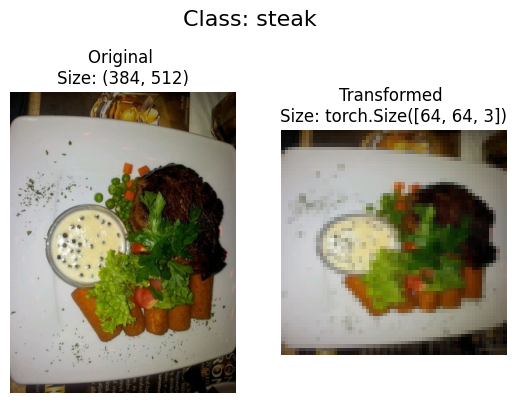

In [190]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [191]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,transform=data_transform)
print(f"Train data:\n{train_data}\n Test data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [192]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [193]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [194]:
len(train_data),len(test_data)

(225, 75)

In [195]:
img,label=train_data[0][0],train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image Shape:\n{img.shape}")
print(f"Image label:{label}")
print(f"Label datatype:{type(label)}")


Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

orginal shape:torch.Size([3, 64, 64])
Image permute shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

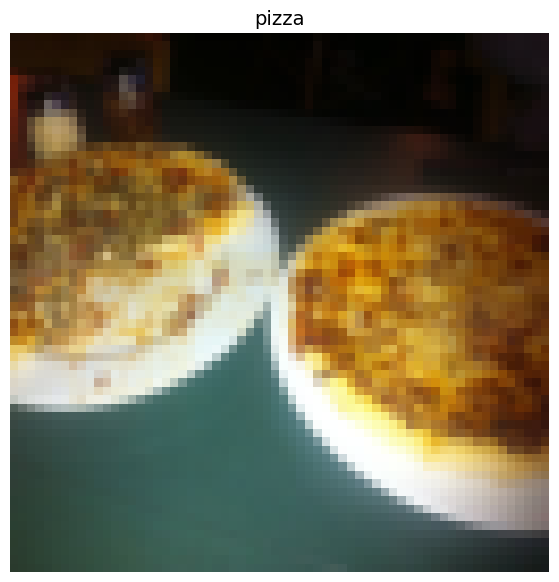

In [196]:
img_permute=img.permute(1,2,0)
print(f"orginal shape:{img.shape}")
print(f"Image permute shape:{img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [197]:
#Image load with custom dataset without.ImageFolder()
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [198]:
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [199]:
target_directory=train_dir
print(f"Target directory:{target_directory}")
class_names=sorted([entry.name for entry in os.scandir(image_path/"train")])
print(f"class names:{class_names}")

Target directory:data/pizza_steak_sushi/train
class names:['pizza', 'steak', 'sushi']


In [200]:
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
  class_to_idx={cls_name:i for i,cls_name in enumerate(classes)}
  return classes,class_to_idx

In [201]:

from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [202]:
train_transforms=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [203]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f21422dcb90>,
 <__main__.ImageFolderCustom at 0x7f2142262270>)

In [204]:
len(train_data_custom),len(test_data_custom)

(225, 75)

In [205]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [206]:

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes.")

    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

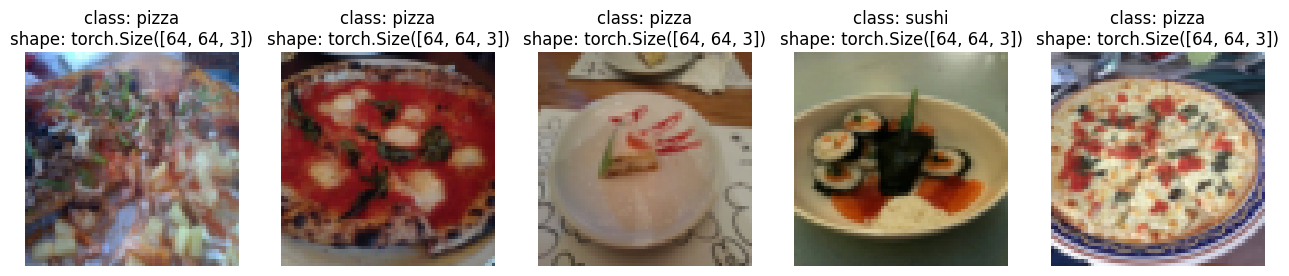

In [207]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [208]:
from torch.utils.data import DataLoader
train_dataloader_custom=DataLoader(dataset=train_data_custom,batch_size=1,num_workers=0,shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom,batch_size=1,num_workers=0,shuffle=False)

In [209]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

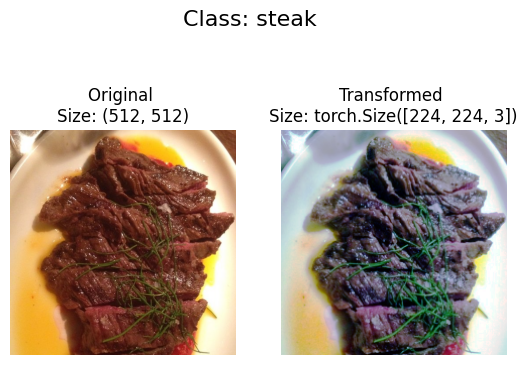

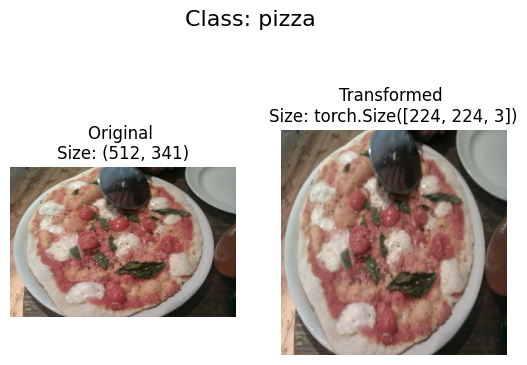

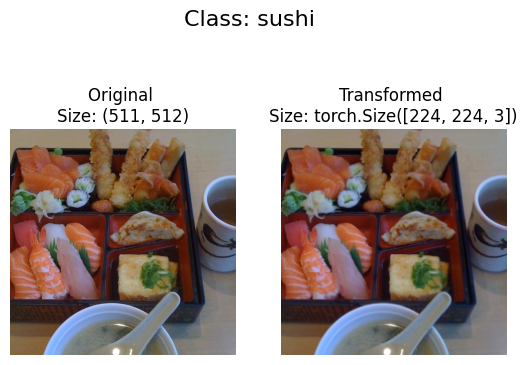

In [210]:

image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [211]:
simple_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

In [212]:
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=simple_transform)
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")
train_dataloader_simple=DataLoader(train_data_simple,batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS)
test_dataloader_simple=DataLoader(test_data_simple,batch_size=BATCH_SIZE,shuffle=False,num_workers=NUM_WORKERS)
train_dataloader_simple,test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f2141f81220>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2142010d40>)

In [213]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
    self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
          x = self.conv_block_1(x)
          x = self.conv_block_2(x)
          x = self.classifier(x)

          return x
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [214]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [215]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)


    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [216]:
def test_step(model: torch.nn.Module,dataloader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)


            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [217]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,train_dataloader: torch.utils.data.DataLoader,test_dataloader: torch.utils.data.DataLoader, optimizer: torch.optim.Optimizer,loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),epochs: int = 5):

    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
    return results

In [218]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 10
model_0 = TinyVGG(input_shape=3,hidden_units=10, output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,test_dataloader=test_dataloader_simple,optimizer=optimizer,loss_fn=loss_fn, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1342 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.2930 | test_loss: 1.1435 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0964 | train_acc: 0.3164 | test_loss: 1.1485 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.1184 | train_acc: 0.3242 | test_loss: 1.1416 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.1010 | train_acc: 0.3633 | test_loss: 1.1043 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0884 | train_acc: 0.4883 | test_loss: 1.0666 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.0675 | train_acc: 0.4023 | test_loss: 1.0176 | test_acc: 0.5417
Total training time: 9.604 seconds


In [219]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [220]:
def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

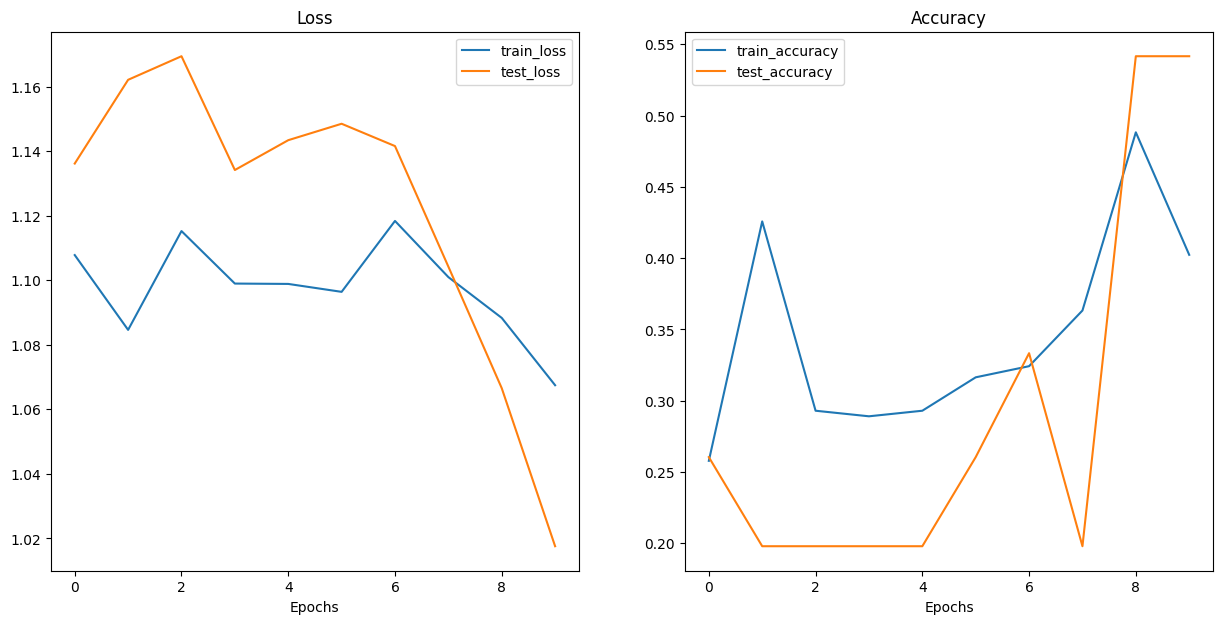

In [221]:
plot_loss_curves(model_0_results)

Model1

In [222]:
train_transform_trag=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()

])
test_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [223]:
train_data_aug=datasets.ImageFolder(train_dir,transform=train_transform_trag)
test_data_aug=datasets.ImageFolder(test_dir,transform=test_transform)
train_data_aug,test_data_aug

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [224]:
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)
train_dataloader_aug=DataLoader(train_data_aug,batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS)
test_dataloader_aug=DataLoader(test_data_aug,batch_size=BATCH_SIZE,shuffle=False,num_workers=NUM_WORKERS)
train_dataloader_aug,test_dataloader_aug

(<torch.utils.data.dataloader.DataLoader at 0x7f21c3bb5af0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f21c2ee3d40>)

In [225]:
torch.manual_seed(42)
model_1=TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_aug.classes)).to(device)
model_1


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [226]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS=15
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.001)
from timeit import default_timer as timer
start_time=timer()
model_1_results=train(model=model_1,train_dataloader=train_dataloader_aug,
                      test_dataloader=test_dataloader_aug,
                      optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS)
end_time=timer()
print(f"Total Train Time:{end_time-start_time:.3f}seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1388 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1293 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0900 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.0969 | train_acc: 0.3047 | test_loss: 1.1462 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0914 | train_acc: 0.4609 | test_loss: 1.1481 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1019 | train_acc: 0.2930 | test_loss: 1.1537 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1219 | train_acc: 0.2930 | test_loss: 1.1469 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0966 | train_acc: 0.2930 | test_loss: 1.1128 | test_acc: 0.2292
Epoch: 11 | train_loss: 1.0919 | train_acc: 0.4375 | test_loss: 1.1076 | test_acc: 0.2604
Epoch: 12 | train_l

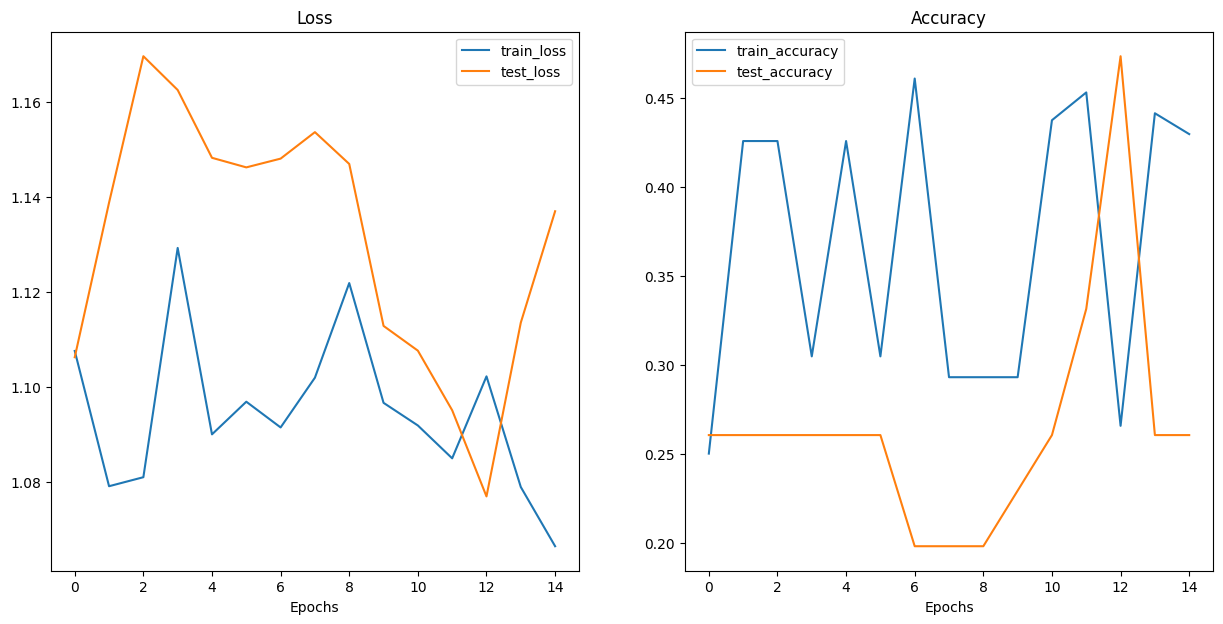

In [227]:
plot_loss_curves(model_1_results)

Compare model results

In [228]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162168,0.197917
2,1.115279,0.292969,1.169481,0.197917
3,1.099003,0.289062,1.134203,0.197917
4,1.098892,0.292969,1.143452,0.197917
5,1.096435,0.316406,1.148546,0.260417
6,1.118419,0.324219,1.141628,0.333333
7,1.101009,0.363281,1.104256,0.197917
8,1.088357,0.488281,1.066572,0.541667
9,1.067489,0.402344,1.017578,0.541667


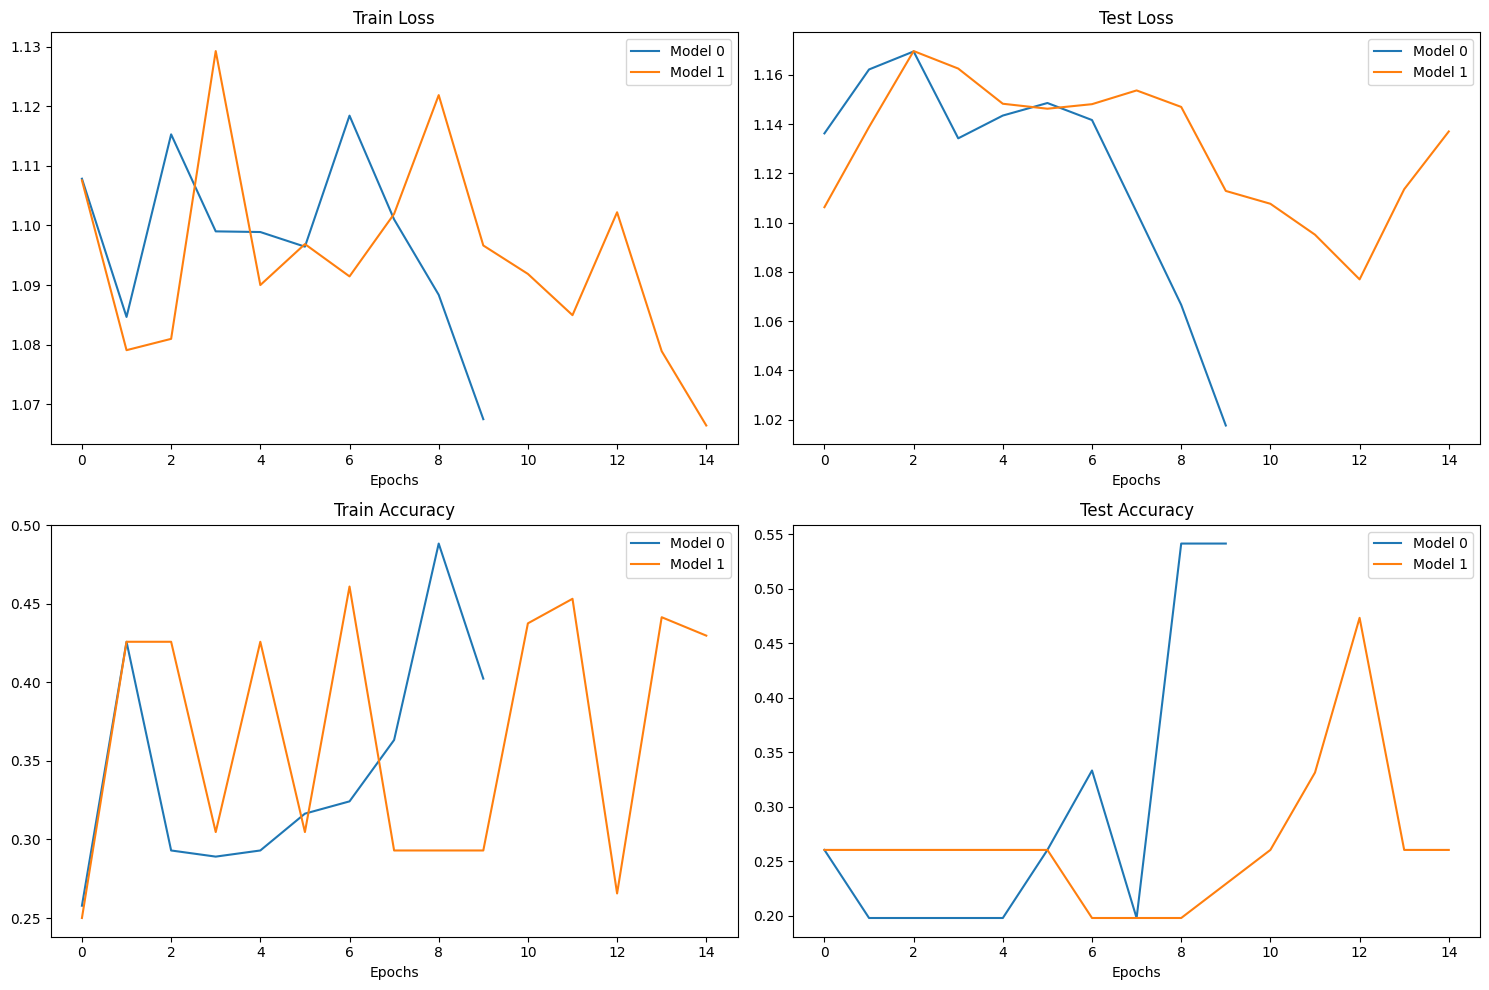

In [230]:
plt.figure(figsize=(15, 10))

epochs_0 = range(len(model_0_df))
epochs_1 = range(len(model_1_df))

plt.subplot(2, 2, 1)
plt.plot(epochs_0, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs_1, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs_0, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs_1, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs_0, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs_1, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs_0, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs_1, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [231]:
inference_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [232]:
model_1 = model_1.to(device)
model_1.eval()


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [233]:
def predict_image(model, image_path, class_names, transform, device):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.inference_mode():
        logits = model(img_tensor)
        probs = torch.softmax(logits, dim=1)
        pred_class = probs.argmax(dim=1)

    return {
        "class": class_names[pred_class.item()],
        "confidence": probs.max().item()
    }


In [234]:

def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = device
):
    target_image = Image.open(image_path).convert("RGB")

    if transform is None:
        raise ValueError("Transform must be provided")

    target_image_tensor = transform(target_image).unsqueeze(0).to(device)

    model = model.to(device)
    model.eval()

    with torch.inference_mode():
        logits = model(target_image_tensor)
        probs = torch.softmax(logits, dim=1)
        pred_label = probs.argmax(dim=1)

    plt.imshow(target_image)
    if class_names:
        title = f"Pred: {class_names[pred_label.item()]} | Prob: {probs.max().item():.3f}"
    else:
        title = f"Pred: {pred_label.item()} | Prob: {probs.max().item():.3f}"
    plt.title(title)
    plt.axis("off")


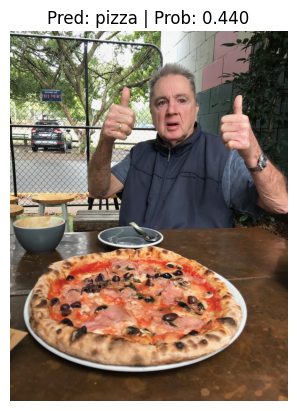

In [235]:
pred_and_plot_image(
    model=model_1,
    image_path="/content/04-pizza-dad.jpeg",
    class_names=class_names,
    transform=inference_transform,
    device=device
)
